In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns

In [3]:
%store -r data_array_fc_ec_values
%store -r data_array_ec_values
%store -r data_array_fc_era_values
%store -r mean_era5_06_29
%store -r D_06_29_ec 
%store -r data_array_fc_era_values_cleaned
%store -r D_06_29_fcn_era 

%store -r data_array_fc_ec_values_cleaned
%store -r D_06_29_fc_ec  

In [4]:
data_fc_ec_06_15 = data_array_fc_ec_values[0,1:51]
data_fc_ec_06_16 = data_array_fc_ec_values[1,1:51]
data_fc_ec_06_17 = data_array_fc_ec_values[2,1:51]
data_fc_ec_06_18 = data_array_fc_ec_values[3,1:51]
data_fc_ec_06_19 = data_array_fc_ec_values[4,1:51]
data_fc_ec_06_20 = data_array_fc_ec_values[5,1:51]
data_fc_ec_06_21 = data_array_fc_ec_values[6,1:51]
data_fc_ec_06_22 = data_array_fc_ec_values[7,1:51]
data_fc_ec_06_23 = data_array_fc_ec_values[8,1:51]
data_fc_ec_06_24 = data_array_fc_ec_values[9,1:51]
data_fc_ec_06_25 = data_array_fc_ec_values[10,1:51]
data_fc_ec_06_26 = data_array_fc_ec_values[11,1:51]
data_fc_ec_06_27 = data_array_fc_ec_values[12,1:51]
data_fc_ec_06_28 = data_array_fc_ec_values[13,1:51]
data_fc_ec_06_29 = data_array_fc_ec_values[14,1:51]

In [11]:
data_fc_ec_06_29 = data_array_ec_values[14,:]
data_fc_ec_06_29

<xarray.DataArray (dim_1: 50)>
array([301.3316 , 301.8708 , 301.53986, 301.4633 , 301.37335, 301.68857,
       301.33456, 301.63327, 301.14612, 301.63818, 301.4213 , 301.5795 ,
       301.2556 , 301.63104, 301.53275, 301.26895, 301.23743, 300.8473 ,
       301.79593, 301.46066, 300.38983, 301.42075, 301.40353, 301.6178 ,
       301.29105, 301.70035, 301.56973, 301.44424, 301.52847, 300.7327 ,
       301.4337 , 301.9411 , 301.48965, 301.19376, 301.1825 , 301.42484,
       301.5778 , 301.15598, 301.58856, 301.349  , 301.6307 , 301.3518 ,
       301.64792, 300.56897, 301.3253 , 300.84662, 301.3375 , 301.77176,
       301.6366 , 301.58563], dtype=float32)
Dimensions without coordinates: dim_1

In [12]:
index = [29,45]
data_fc_ec_06_17 = np.delete(data_fc_ec_06_17, index)

In [13]:
data_fc_era_06_15 = data_array_fc_era_values[0,1:51]
data_fc_era_06_16 = data_array_fc_era_values[1,1:51]
data_fc_era_06_17 = data_array_fc_era_values[2,1:51]
data_fc_era_06_18 = data_array_fc_era_values[3,1:51]
data_fc_era_06_19 = data_array_fc_era_values[4,1:51]
data_fc_era_06_20 = data_array_fc_era_values[5,1:51]
data_fc_era_06_21 = data_array_fc_era_values[6,1:51]
data_fc_era_06_22 = data_array_fc_era_values[7,1:51]
data_fc_era_06_23 = data_array_fc_era_values[8,1:51]
data_fc_era_06_24 = data_array_fc_era_values[9,1:51]
data_fc_era_06_25 = data_array_fc_era_values[10,1:51]
data_fc_era_06_26 = data_array_fc_era_values[11,1:51]
data_fc_era_06_27 = data_array_fc_era_values[12,1:51]
data_fc_era_06_28 = data_array_fc_era_values[13,1:51]
data_fc_era_06_29 = data_array_fc_era_values[14,1:51]

In [14]:
index = [5,15,25]
data_fc_era_06_15 = np.delete(data_fc_era_06_15, index)

In [15]:
fc_ec = [data_fc_ec_06_15,data_fc_ec_06_16,data_fc_ec_06_17,data_fc_ec_06_18,data_fc_ec_06_19,data_fc_ec_06_20,data_fc_ec_06_21,data_fc_ec_06_22,data_fc_ec_06_23,data_fc_ec_06_24
    ,data_fc_ec_06_25,data_fc_ec_06_26,data_fc_ec_06_27,data_fc_ec_06_28,data_fc_ec_06_29]
fc_era = [data_fc_era_06_15,data_fc_era_06_16,data_fc_era_06_17,data_fc_era_06_18,data_fc_era_06_19,data_fc_era_06_20,data_fc_era_06_21,data_fc_era_06_22,data_fc_era_06_23,data_fc_era_06_24
    ,data_fc_era_06_25,data_fc_era_06_26,data_fc_era_06_27,data_fc_era_06_28,data_fc_era_06_29]

In [16]:
#group plots

import matplotlib.pyplot as pl


colors = ['pink', 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [fc_ec,data_array_ec_values[:,:].T,fc_era]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 

<xarray.DataArray ()>
array(309.36750119)

-1.0
0.0
1.0


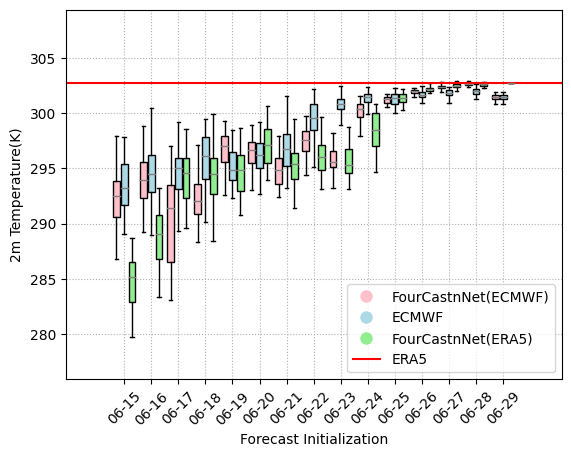

In [17]:
ax = pl.gca()
ax.set_ylim(ymin,ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,
                showfliers = False
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)', 'ECMWF','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:3], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
#plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_3.png', bbox_inches='tight',dpi=100)
plt.savefig('/home/kit/imk-tro/gj5173/06.09_modified-plts/T2m_ts_ensemble_box_3together_withjumps.png', bbox_inches='tight',dpi=100)#
pl.show()